<a href="https://colab.research.google.com/github/samj2199/Music-Composition-Similarity-detection/blob/main/Pattern_Project_with_the_required_values_good_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa numpy scipy matplotlib


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/PR_PROJ/'
sail_audio, sr_sail = librosa.load(path + 'Sail-Awolnation.wav')
one_and_only_audio, sr_one_and_only = librosa.load(path + 'One-and-Only.wav')


In [ ]:
#Just to remember that Timbre has still not been extracted. Work on that next!!!!!
def extract_features(audio, sr):
    # Notes Pattern
    pitches, magnitudes = librosa.core.piptrack(y=audio, sr=sr)
    notes_pattern = np.argmax(pitches, axis=0)

    #Chord Progression Pattern
    chroma = librosa.feature.chroma_cqt(y=audio, sr=sr)
    chord_progression_pattern = np.mean(chroma, axis=1)

    #Beats Pattern and Rhythmic Structure
    tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sr)
    beats_pattern = librosa.frames_to_time(beat_frames, sr=sr)

    #Form and Structure (This is a more complex task and may require manual annotation or advanced analysis)

    #Use of Silence and Space
    rmse = librosa.feature.rms(y=audio)
    silence_and_space = 1 - np.mean(rmse)

    #Tempo
    return {
        'notes_pattern': notes_pattern,
        'chord_progression_pattern': chord_progression_pattern,
        'beats_pattern': beats_pattern,
        'silence_and_space': silence_and_space,
        'tempo': tempo
    }

sail_features = extract_features(sail_audio, sr_sail)
one_and_only_features = extract_features(one_and_only_audio, sr_one_and_only)


In [ ]:
def calculate_similarity(feature_a, feature_b):
    # Remember that we are using cosine similarity as a metric
    return 1 - cosine(feature_a, feature_b)


In [ ]:
pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512704 sha256=891b482fd4aa35b7fe7c081b4fbddde1aab35242a9f2e1c5dc97b96ba7efe722
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install fastdtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def calculate_similarity_dtw(feature_a, feature_b):
    distance, _ = fastdtw(feature_a, feature_b, dist=euclidean)
    return 1 / (1 + distance)  # Convert distance to similarity

In [ ]:
notes_similarity = calculate_similarity_dtw(sail_features['notes_pattern'].reshape(-1, 1),
                                             one_and_only_features['notes_pattern'].reshape(-1, 1))
chord_similarity = calculate_similarity(sail_features['chord_progression_pattern'], one_and_only_features['chord_progression_pattern'])
beats_similarity = calculate_similarity_dtw(sail_features['beats_pattern'].reshape(-1, 1),
                                            one_and_only_features['beats_pattern'].reshape(-1, 1))
silence_similarity = calculate_similarity([sail_features['silence_and_space']], [one_and_only_features['silence_and_space']])
tempo_similarity = calculate_similarity([sail_features['tempo']], [one_and_only_features['tempo']])

print(f'Notes Pattern Similarity: {notes_similarity}')
print(f'Chord Progression Similarity: {chord_similarity}')
print(f'Use of Silence and Space Similarity: {silence_similarity}')
print(f'Tempo Similarity: {tempo_similarity}')


Notes Pattern Similarity: 9.243801568858003e-07
Chord Progression Similarity: 0.8548324108123779
Use of Silence and Space Similarity: 1
Tempo Similarity: 1


In [ ]:
pip install librosa


In [ ]:
import librosa
import numpy as np

def extract_mfcc(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfccs.mean(axis=1)

In [ ]:
sail_mfcc = extract_mfcc(path + 'Sail-Awolnation.wav')
one_and_only_mfcc = extract_mfcc(path + 'One-and-Only.wav')

In [ ]:
timbre_similarity = calculate_similarity(sail_mfcc, one_and_only_mfcc)
print(f'Timbre Similarity: {timbre_similarity}')

Timbre Similarity: 0.9500380754470825


In [ ]:
pip install librosa numpy matplotlib


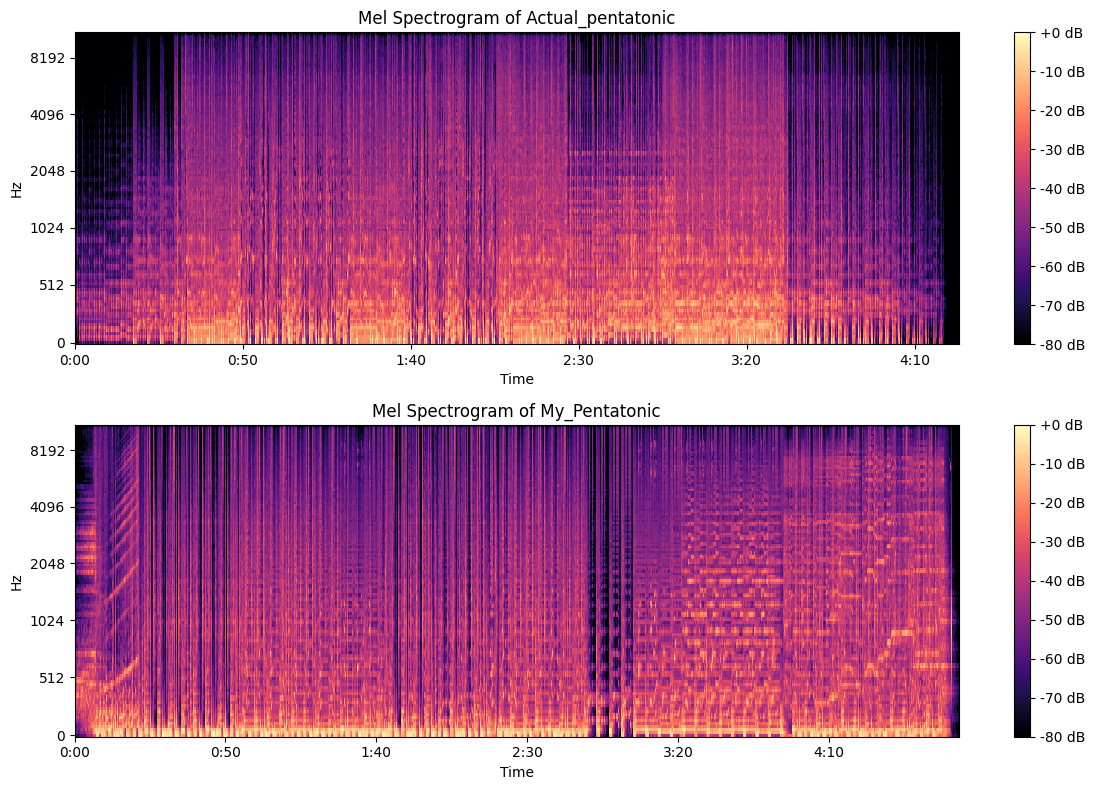

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Check path correctly.
sail_awolnation_path = "/content/drive/MyDrive/PR_PROJ/Sail-Awolnation.wav"
one_and_only_path = "/content/drive/MyDrive/PR_PROJ/One-and-Only.wav"

# Loading the audio files
y_sail, sr_sail = librosa.load(sail_awolnation_path)
y_one_and_only, sr_one_and_only = librosa.load(one_and_only_path)

# Generating Mel spectrograms
S_sail = librosa.feature.melspectrogram(y=y_sail, sr=sr_sail)
S_one_and_only = librosa.feature.melspectrogram(y=y_one_and_only, sr=sr_one_and_only)

# Converting to log scale (dB)
log_S_sail = librosa.power_to_db(S_sail, ref=np.max)
log_S_one_and_only = librosa.power_to_db(S_one_and_only, ref=np.max)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(log_S_sail, sr=sr_sail, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Actual_pentatonic')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(log_S_one_and_only, sr=sr_one_and_only, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of My_Pentatonic')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()



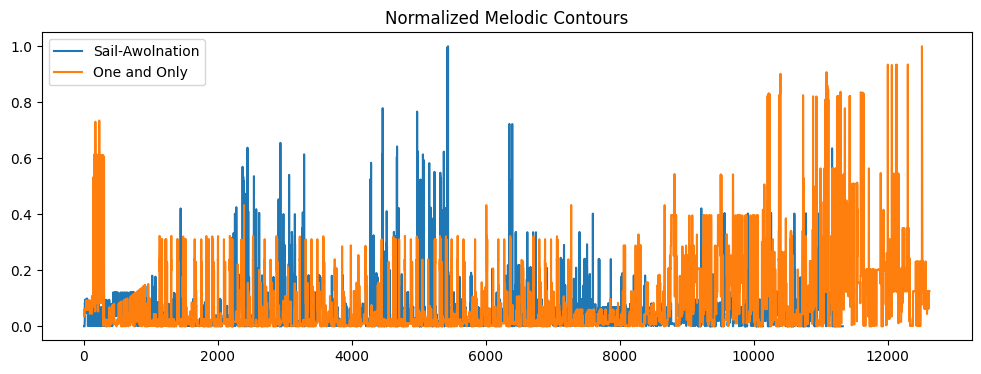

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def extract_melody(y, sr):
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch.append(pitches[index, t])
    pitch = np.array(pitch)
    return pitch

def normalize_pitch(pitch):
    non_zero_pitches = pitch[pitch > 0]
    min_pitch = non_zero_pitches.min()
    max_pitch = non_zero_pitches.max()
    normalized_pitch = (pitch - min_pitch) / (max_pitch - min_pitch)
    normalized_pitch[pitch == 0] = 0
    return normalized_pitch

# Loading the audio files
y_sail, sr_sail = librosa.load(path + 'Sail-Awolnation.wav')
y_one_and_only, sr_one_and_only = librosa.load(path + 'One-and-Only.wav')

# Extracting melody
melody_sail = extract_melody(y_sail, sr_sail)
melody_one_and_only = extract_melody(y_one_and_only, sr_one_and_only)

# Normalizing pitch
normalized_melody_sail = normalize_pitch(melody_sail)
normalized_melody_one_and_only = normalize_pitch(melody_one_and_only)

# Plot the melodic contours
plt.figure(figsize=(12, 4))
plt.plot(normalized_melody_sail, label='Sail-Awolnation')
plt.plot(normalized_melody_one_and_only, label='One and Only')
plt.title('Normalized Melodic Contours')
plt.legend()
plt.show()
